https://www.youtube.com/watch?v=JgGVHAHkxKU

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# Análise dos Dados

In [2]:
df = pd.read_csv('Mall_Customers.csv')

Verificando os dados

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

Estatística descritiva

In [5]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tipos de Dados

In [6]:
df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Verificando registros Nulos

In [7]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualização de Dados

In [8]:
plt.style.use('fivethirtyeight')

Verificando as distribuição dos dados

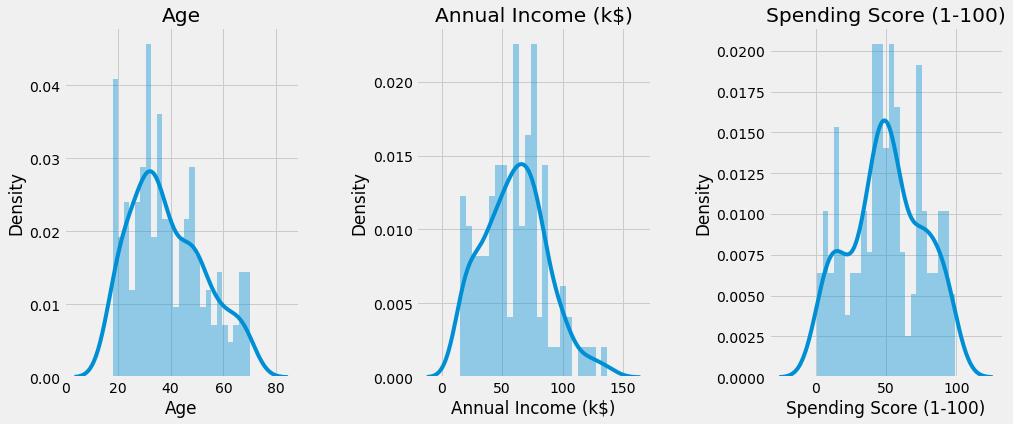

In [9]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 25)
    plt.title('{}'.format(x))
plt.show()
    

Contagem de Amostras por Sexo

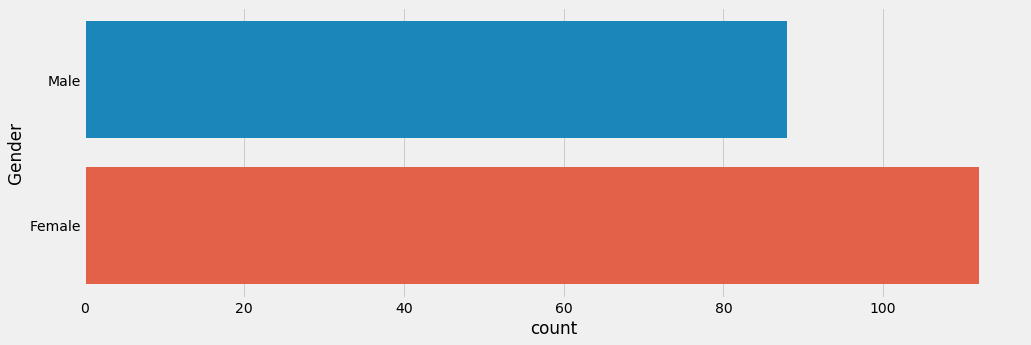

In [10]:
plt.figure(1, figsize = (15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

Idade VS Renda Anual

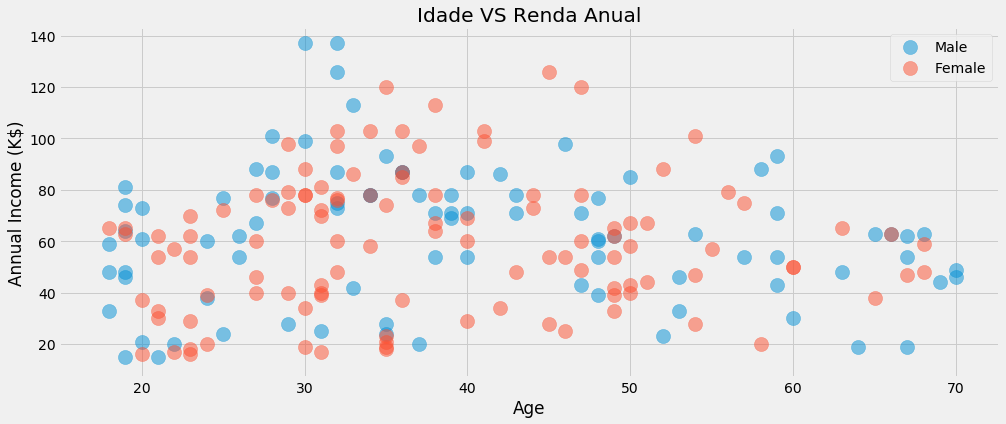

In [15]:
plt.figure(1,figsize = (15, 6))
for gender in ('Male', 'Female'):
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',data = df[df['Gender'] == gender], 
                s = 200, alpha = 0.5, label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (K$)')
plt.title('Idade VS Renda Anual')
plt.legend()
plt.show()
    

Distribuição de Idade, Renda Anual e Pontuação de GAstos segmentado por Sexo

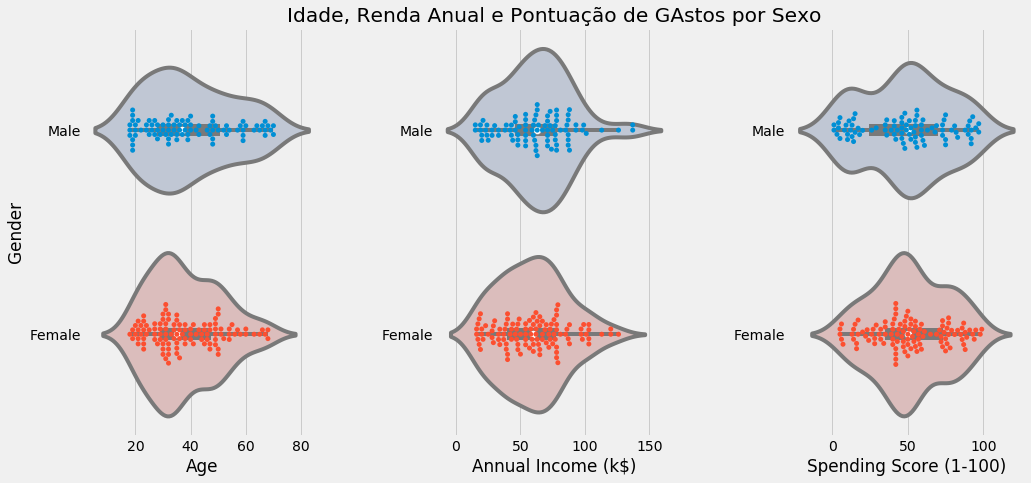

In [16]:
plt.figure(1 , figsize = (15, 7))
n = 0
for cols in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x= cols, y = 'Gender', data = df, palette = 'vlag')
    sns.swarmplot(x = cols, y= 'Gender', data = df)
    plt.ylabel ('Gender'if n==1 else '')
    plt.title('Idade, Renda Anual e Pontuação de GAstos por Sexo' if n == 2 else '')
plt.show()

Agrupamento de dados utilizando o K-Means
Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters)

In [20]:
X2 = df [['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

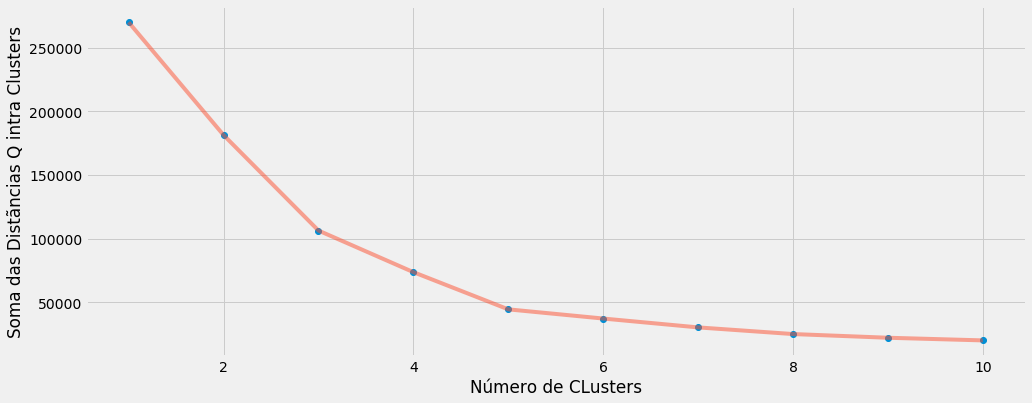

In [23]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Número de CLusters'), plt.ylabel('Soma das Distãncias Q intra Clusters')
plt.show()

In [25]:
algotithm = (KMeans(n_clusters = 4))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualizando os grupos criados e seus centroides

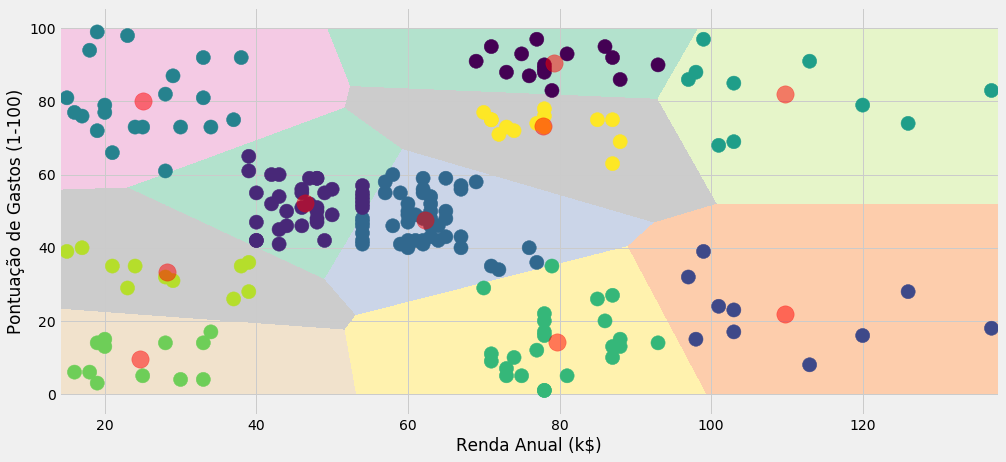

In [38]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_
h = 0.02

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1 , figsize = (15 , 7) )
plt.clf()

Z2 = Z2.reshape(xx.shape)

plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,s = 200 )
plt.scatter(x = centroids2[: , 0] , y = centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.show()


Analisando os dados agrupados

In [31]:
df["clusters"]= algorithm.labels_


In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,8
1,2,Male,21,15,81,4
2,3,Female,20,16,6,7
3,4,Female,23,16,77,4
4,5,Female,31,17,40,8


In [35]:
df_group =df.drop(["CustomerID", "Age"],axis=1).groupby("clusters")

In [36]:
df_group.describe()

Annual Income (k$)                                             \
                      count        mean        std   min    25%    50%   
clusters                                                                 
0                      15.0   79.266667   6.681175  69.0  75.50   78.0   
1                      36.0   46.388889   4.698193  39.0  43.00   46.5   
2                      10.0  109.700000  13.768321  97.0  99.50  103.0   
3                      47.0   62.234043   5.333295  54.0  59.50   62.0   
4                      21.0   25.095238   7.133756  15.0  19.00   24.0   
5                      10.0  109.700000  13.768321  97.0  99.50  103.0   
6                      24.0   79.708333   6.457077  70.0  74.75   78.0   
7                      12.0   24.583333   6.694072  16.0  19.00   22.5   
8                      11.0   28.181818   8.964577  15.0  22.00   28.0   
9                      14.0   77.785714   6.506548  70.0  72.25   77.5   

                        Spending Score (1-100)                              \
             75%    max                  count       mean        std   min   
clusters                                                                     
0          83.50   93.0                   15.0  90.466667   3.795988  83.0   
1          49.00   54.0                   36.0  52.138889   5.986426  41.0   
2         118.25  137.0                   10.0  22.000000   9.140873   8.0   
3          65.00   77.0                   47.0  47.553191   6.839173  34.0   
4          30.00   38.0                   21.0  80.047619  10.249274  61.0   
5         118.25  137.0                   10.0  82.000000   9.463380  68.0   
6          86.25   93.0                   24.0  14.291667   8.917395   1.0   
7          30.75   34.0                   12.0   9.583333   5.282188   3.0   
8          37.50   39.0                   11.0  33.272727   4.474168  26.0   
9          83.25   88.0                   14.0  73.285714   3.791257  63.0   

                                   
            25%   50%   75%   max  
clusters                           
0         88.00  90.0  93.0  97.0  
1         47.75  52.0  56.0  65.0  
2         16.25  20.5  27.0  39.0  
3         42.00  47.0  53.0  60.0  
4         73.00  77.0  87.0  99.0  
5         75.25  84.0  87.5  97.0  
6          8.50  13.0  20.0  35.0  
7          4.75   9.5  14.0  17.0  
8         30.00  35.0  35.5  40.0  
9         72.25  74.5  75.0  78.0